In [10]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('retail_sales_dataset.csv')

# Display the first few rows of the dataframe
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [11]:
print(df['Product Category'].unique())
totalSalesPerCategory = df.groupby('Product Category')['Total Amount'].sum()

print(totalSalesPerCategory)

['Beauty' 'Clothing' 'Electronics']
Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64


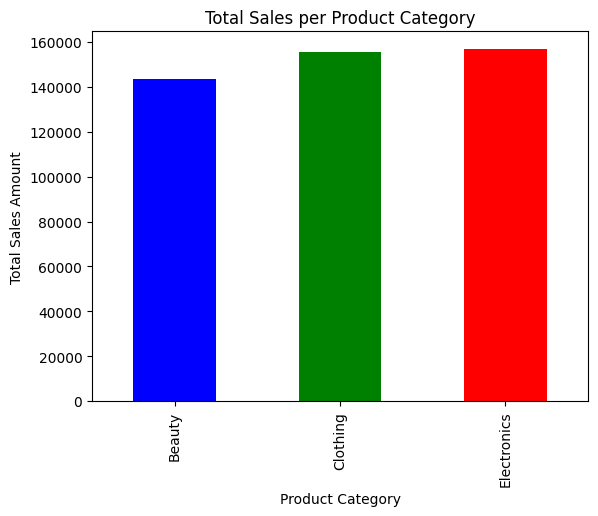

In [12]:
import matplotlib.pyplot as plt

# Plotting the total sales per category
totalSalesPerCategory.plot(kind='bar', color=['blue', 'green', 'red'])

# Adding title and labels
plt.title('Total Sales per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')

# Display the plot
plt.show()

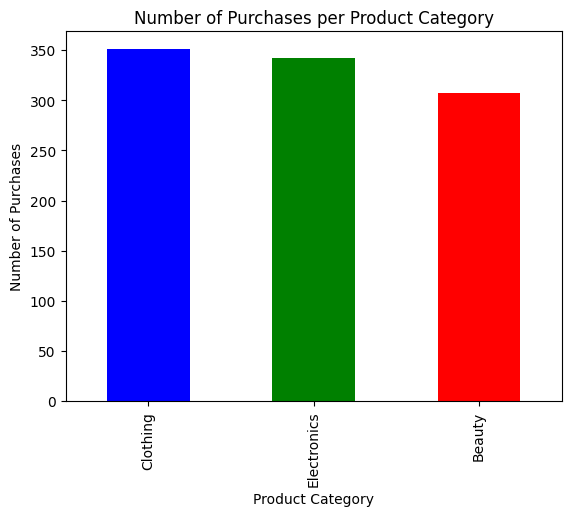

In [13]:
# Group by 'Product Category' and count the number of purchases
purchaseCountPerCategory = df['Product Category'].value_counts()

# Plotting the number of purchases per category
purchaseCountPerCategory.plot(kind='bar', color=['blue', 'green', 'red'])

# Adding title and labels
plt.title('Number of Purchases per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')

# Display the plot
plt.show()

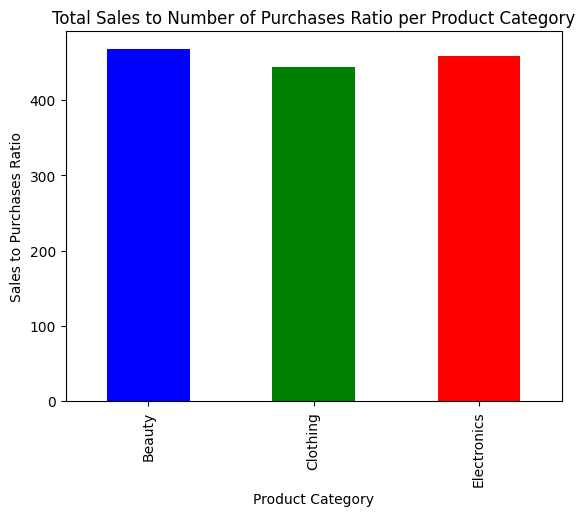

In [14]:
# Calculate the ratio of total sales to the number of purchases for each category
salesToPurchaseRatio = totalSalesPerCategory / purchaseCountPerCategory

# Plotting the ratio
salesToPurchaseRatio.plot(kind='bar', color=['blue', 'green', 'red'])

# Adding title and labels
plt.title('Total Sales to Number of Purchases Ratio per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales to Purchases Ratio')

# Display the plot
plt.show()

In [16]:
# Filter the dataframe for the Beauty category
beautyDf = df[df['Product Category'] == 'Beauty']

# Display the unique prices in the Beauty category
uniqueBeautyPrices = beautyDf['Price per Unit'].unique()
print(uniqueBeautyPrices)

clothingDf = df[df['Product Category'] == 'Clothing']
uniqueClothingPrices = clothingDf['Price per Unit'].unique()
print(uniqueClothingPrices)

electronicsDf = df[df['Product Category'] == 'Electronics']
uniqueElectronicsPrices = electronicsDf['Price per Unit'].unique()
print(uniqueElectronicsPrices)

[ 50  30  25 500 300]
[500  25  50  30 300]
[ 30  25 300 500  50]


In [17]:
# Group by 'Product Category' and 'Price per Unit', then sum the 'Total Amount'
sales_per_price_per_category = df.groupby(['Product Category', 'Price per Unit'])['Total Amount'].sum()

# Display the result
print(sales_per_price_per_category)

Product Category  Price per Unit
Beauty            25                 3925
                  30                 3990
                  50                 8500
                  300               42600
                  500               84500
Clothing          25                 4600
                  30                 5130
                  50                 9450
                  300               57900
                  500               78500
Electronics       25                 4525
                  30                 4230
                  50                 8750
                  300               54900
                  500               84500
Name: Total Amount, dtype: int64


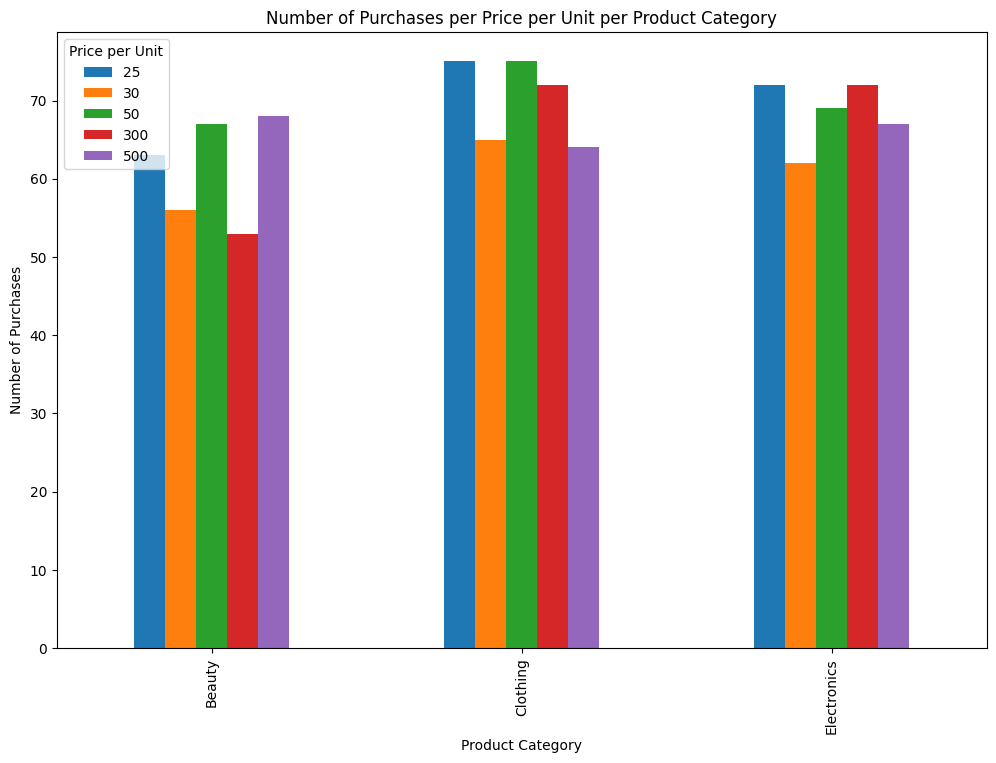

In [20]:
# Group by 'Product Category' and 'Price per Unit', then count the number of purchases
purchase_count_per_price_per_category = df.groupby(['Product Category', 'Price per Unit']).size()

# Unstack the multi-index series to a dataframe for easier plotting
purchase_count_per_price_per_category = purchase_count_per_price_per_category.unstack()

# Plotting the number of purchases per price per unit per category
purchase_count_per_price_per_category.plot(kind='bar', stacked=False, figsize=(12, 8))

# Adding title and labels
plt.title('Number of Purchases per Price per Unit per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')

# Display the plot
plt.show()

In [22]:
# Group by 'Customer ID' and count the number of transactions
purchase_count_per_customer = df.groupby('Customer ID')['Transaction ID'].count()

# Display the result    
print(purchase_count_per_customer)
print(purchase_count_per_customer.unique())

Customer ID
CUST001    1
CUST002    1
CUST003    1
CUST004    1
CUST005    1
          ..
CUST995    1
CUST996    1
CUST997    1
CUST998    1
CUST999    1
Name: Transaction ID, Length: 1000, dtype: int64
[1]


In [28]:
from scipy.stats import levene

# Group by 'Product Category' and 'Customer ID', then calculate the variance of 'Total Amount'
variance_per_sales_per_customer_per_category = df.groupby(['Product Category'])['Total Amount'].var()

# Display the result
print(variance_per_sales_per_customer_per_category)

# Perform Levene's test for equal variances
stat, p_value = levene(beautyDf['Total Amount'], clothingDf['Total Amount'], electronicsDf['Total Amount'])

# Display the result
print(f"Levene's test statistic: {stat}, p-value: {p_value}")

Product Category
Beauty         317659.374401
Clothing       303265.992674
Electronics    322101.822341
Name: Total Amount, dtype: float64
Levene's test statistic: 0.2058412136547202, p-value: 0.813996895189353


In [29]:
from scipy.stats import f_oneway

# Extract the 'Total Amount' for each category
beauty_sales = beautyDf['Total Amount']
clothing_sales = clothingDf['Total Amount']
electronics_sales = electronicsDf['Total Amount']

# Perform ANOVA
anova_result = f_oneway(beauty_sales, clothing_sales, electronics_sales)

# Display the result
print(f"ANOVA test statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

ANOVA test statistic: 0.159430595139859, p-value: 0.8526508750301867



### Insights from the Distribution of Sales Across Different Product Categories

1. **Total Sales per Category**:
    - The total sales amount for each product category is as follows:
      - Beauty: \$143,515
      - Clothing: \$155,580
      - Electronics: \$156,905
    - Electronics has the highest total sales, followed closely by Clothing, with Beauty having the lowest total sales among the three categories.

2. **Number of Purchases per Category**:
    - The number of purchases for each product category is:
      - Beauty: 307 purchases
      - Clothing: 351 purchases
      - Electronics: 342 purchases
    - Clothing has the highest number of purchases, followed by Electronics, with Beauty having the least number of purchases.

3. **Sales to Purchase Ratio**:
    - The ratio of total sales to the number of purchases for each category is:
      - Beauty: 467.48
      - Clothing: 443.25
      - Electronics: 458.79
    - Beauty has the highest sales to purchase ratio, indicating that on average, each purchase in the Beauty category generates more revenue compared to the other categories.

4. **Price per Unit Distribution**:
    - The unique prices per unit for each category are:
      - Beauty: \$25, \$30, \$50, \$300, \$500
      - Clothing: \$25, \$30, \$50, \$300, \$500
      - Electronics: \$25, \$30, \$50, \$300, \$500
    - All categories have a similar range of prices per unit, suggesting a consistent pricing strategy across different product categories.

5. **Variance in Sales Amount**:
    - The variance in total sales amount per customer for each category is:
      - Beauty: 317,659.37
      - Clothing: 303,265.99
      - Electronics: 322,101.82
    - Electronics has the highest variance, indicating a wider spread in the sales amounts, while Clothing has the lowest variance.

6. **ANOVA Test Results**:
    - The ANOVA test statistic is 0.1594 with a p-value of 0.8527.
    - The high p-value suggests that there is no statistically significant difference in the mean sales amounts across the different product categories.

These insights provide a comprehensive understanding of the sales distribution across different product categories, highlighting key metrics such as total sales, purchase counts, sales to purchase ratios, price distributions, and variance in sales amounts.


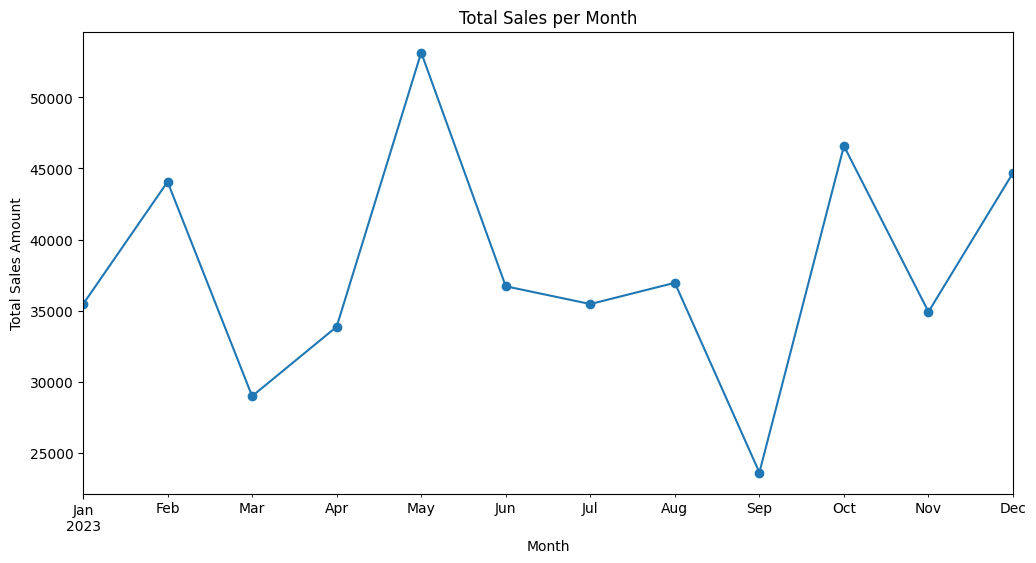

In [35]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month and year from the 'Date' column
df['YearMonth'] = df['Date'].dt.to_period('M')

# Group by 'YearMonth' and sum the 'Total Amount'
total_sales_per_month = df.groupby('YearMonth')['Total Amount'].sum()

total_sales_per_month = total_sales_per_month[total_sales_per_month.index != '2024-01']

# Plotting the total sales per month
total_sales_per_month.plot(kind='line', marker='o', figsize=(12, 6))

# Adding title and labels
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')

# Display the plot
plt.show()

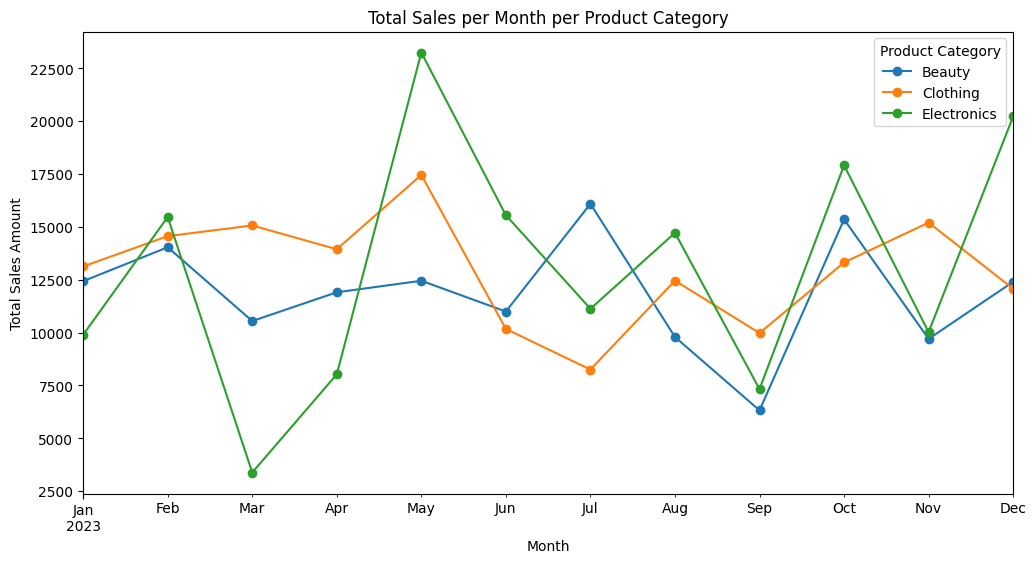

In [37]:
# Group by 'YearMonth' and 'Product Category', then sum the 'Total Amount'
total_sales_per_month_per_category = df.groupby(['YearMonth', 'Product Category'])['Total Amount'].sum().unstack()

# Remove the January 2024 data
total_sales_per_month_per_category = total_sales_per_month_per_category[total_sales_per_month_per_category.index != '2024-01']

# Plotting the total sales per month for each category
total_sales_per_month_per_category.plot(kind='line', marker='o', figsize=(12, 6))

# Adding title and labels
plt.title('Total Sales per Month per Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')

# Display the plot
plt.show()

In [34]:
from statsmodels.tsa.stattools import adfuller

# Function to perform ADF test and print the result
def adf_test(series, category_name):
    result = adfuller(series)
    print(f'ADF Statistic for {category_name}: {result[0]}')
    print(f'p-value for {category_name}: {result[1]}')
    print('\n')

# Perform ADF test for each product category
adf_test(total_sales_per_month_per_category['Beauty'].dropna(), 'Beauty')
adf_test(total_sales_per_month_per_category['Clothing'].dropna(), 'Clothing')
adf_test(total_sales_per_month_per_category['Electronics'].dropna(), 'Electronics')

ADF Statistic for Beauty: 5.298690125861714
p-value for Beauty: 1.0


ADF Statistic for Clothing: -2.0140097352867548
p-value for Clothing: 0.28046430318463056


ADF Statistic for Electronics: -5.222839734216568
p-value for Electronics: 7.895584561046414e-06




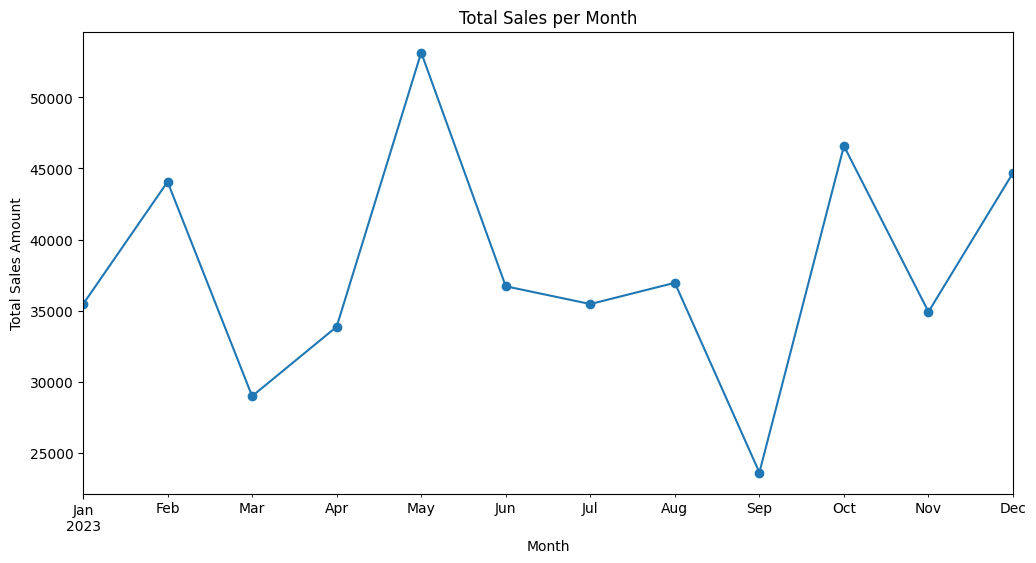

### Seasonal Trends in Total Sales
1. **January**: Sales start relatively high, indicating a post-holiday shopping trend.
2. **February**: Sales increase, possibly due to Valentine's Day promotions.
3. **March**: A slight dip in sales, which could be due to the end of winter sales.
4. **April**: Sales remain steady, with a slight increase.
5. **May**: A significant peak in sales, possibly due to spring promotions and Mother's Day.
6. **June**: Sales dip slightly, indicating a slower shopping period.
7. **July**: Another peak in sales, potentially due to summer sales and back-to-school shopping.
8. **August**: Sales remain steady, with a slight increase.
9. **September**: A noticeable dip in sales, which could be due to the end of summer.
10. **October**: Sales increase again, possibly due to early holiday shopping.
11. **November**: A peak in sales, likely due to Black Friday and Cyber Monday promotions.
12. **December**: Another peak in sales, driven by holiday shopping.


In [39]:
# Plotting the total sales per month
total_sales_per_month.plot(kind='line', marker='o', figsize=(12, 6))

# Adding title and labels
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')

# Display the plot
plt.show()

# Describe the trends
print("### Seasonal Trends in Total Sales")
print("1. **January**: Sales start relatively high, indicating a post-holiday shopping trend.")
print("2. **February**: Sales increase, possibly due to Valentine's Day promotions.")
print("3. **March**: A slight dip in sales, which could be due to the end of winter sales.")
print("4. **April**: Sales remain steady, with a slight increase.")
print("5. **May**: A significant peak in sales, possibly due to spring promotions and Mother's Day.")
print("6. **June**: Sales dip slightly, indicating a slower shopping period.")
print("7. **July**: Another peak in sales, potentially due to summer sales and back-to-school shopping.")
print("8. **August**: Sales remain steady, with a slight increase.")
print("9. **September**: A noticeable dip in sales, which could be due to the end of summer.")
print("10. **October**: Sales increase again, possibly due to early holiday shopping.")
print("11. **November**: A peak in sales, likely due to Black Friday and Cyber Monday promotions.")
print("12. **December**: Another peak in sales, driven by holiday shopping.")

### Recommendations for the Store Based on Sales Trends

1. **Leverage Seasonal Peaks**:
    - **January**: Capitalize on post-holiday shopping trends by offering New Year promotions.
    - **February**: Boost sales with Valentine's Day promotions.
    - **May**: Increase marketing efforts for spring promotions and Mother's Day.
    - **July**: Focus on summer sales and back-to-school shopping.
    - **November**: Maximize sales during Black Friday and Cyber Monday.
    - **December**: Enhance holiday shopping experience with special deals and promotions.

2. **Address Sales Dips**:
    - **March**: Introduce end-of-winter clearance sales to maintain sales momentum.
    - **June**: Offer early summer discounts to counteract the slower shopping period.
    - **September**: Implement back-to-school promotions to mitigate the end-of-summer sales dip.

3. **Consistent Promotions**:
    - Maintain a consistent pricing strategy across different product categories, as observed in the uniform price ranges.
    - Regularly offer promotions on popular price points (e.g., $25, $50, $300, $500) to attract price-sensitive customers.

4. **Category-Specific Strategies**:
    - **Beauty**: Highlight the high sales-to-purchase ratio by promoting premium beauty products.
    - **Clothing**: Focus on increasing the number of purchases through frequent sales and loyalty programs.
    - **Electronics**: Emphasize the wide range of products and offer bundle deals to increase average transaction value.

5. **Customer Engagement**:
    - Utilize customer data to personalize marketing campaigns and offer targeted promotions.
    - Encourage repeat purchases through loyalty programs and exclusive member discounts.

6. **Monitor and Adapt**:
    - Continuously monitor sales trends and customer behavior to adapt marketing strategies accordingly.
    - Perform regular analysis of sales data to identify emerging trends and adjust inventory and promotions.

By implementing these recommendations, the store can optimize its sales strategy, enhance customer satisfaction, and drive overall revenue growth.